In [1]:
# Common Imports
import numpy as np
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes' , labelsize=14)
mpl.rc('xtick' , labelsize=12)
mpl.rc('ytick' , labelsize=12)

# Ignoring useless warnings
import warnings
warnings.filterwarnings(action="ignore" , message="^internal gelsd")

In [2]:
housing_data=pd.read_csv('housing_train.csv')

In [3]:
housing_data2=housing_data

In [4]:
housing_data2.shape

(1460, 81)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250ABC0CD60>,
      dtype=object)

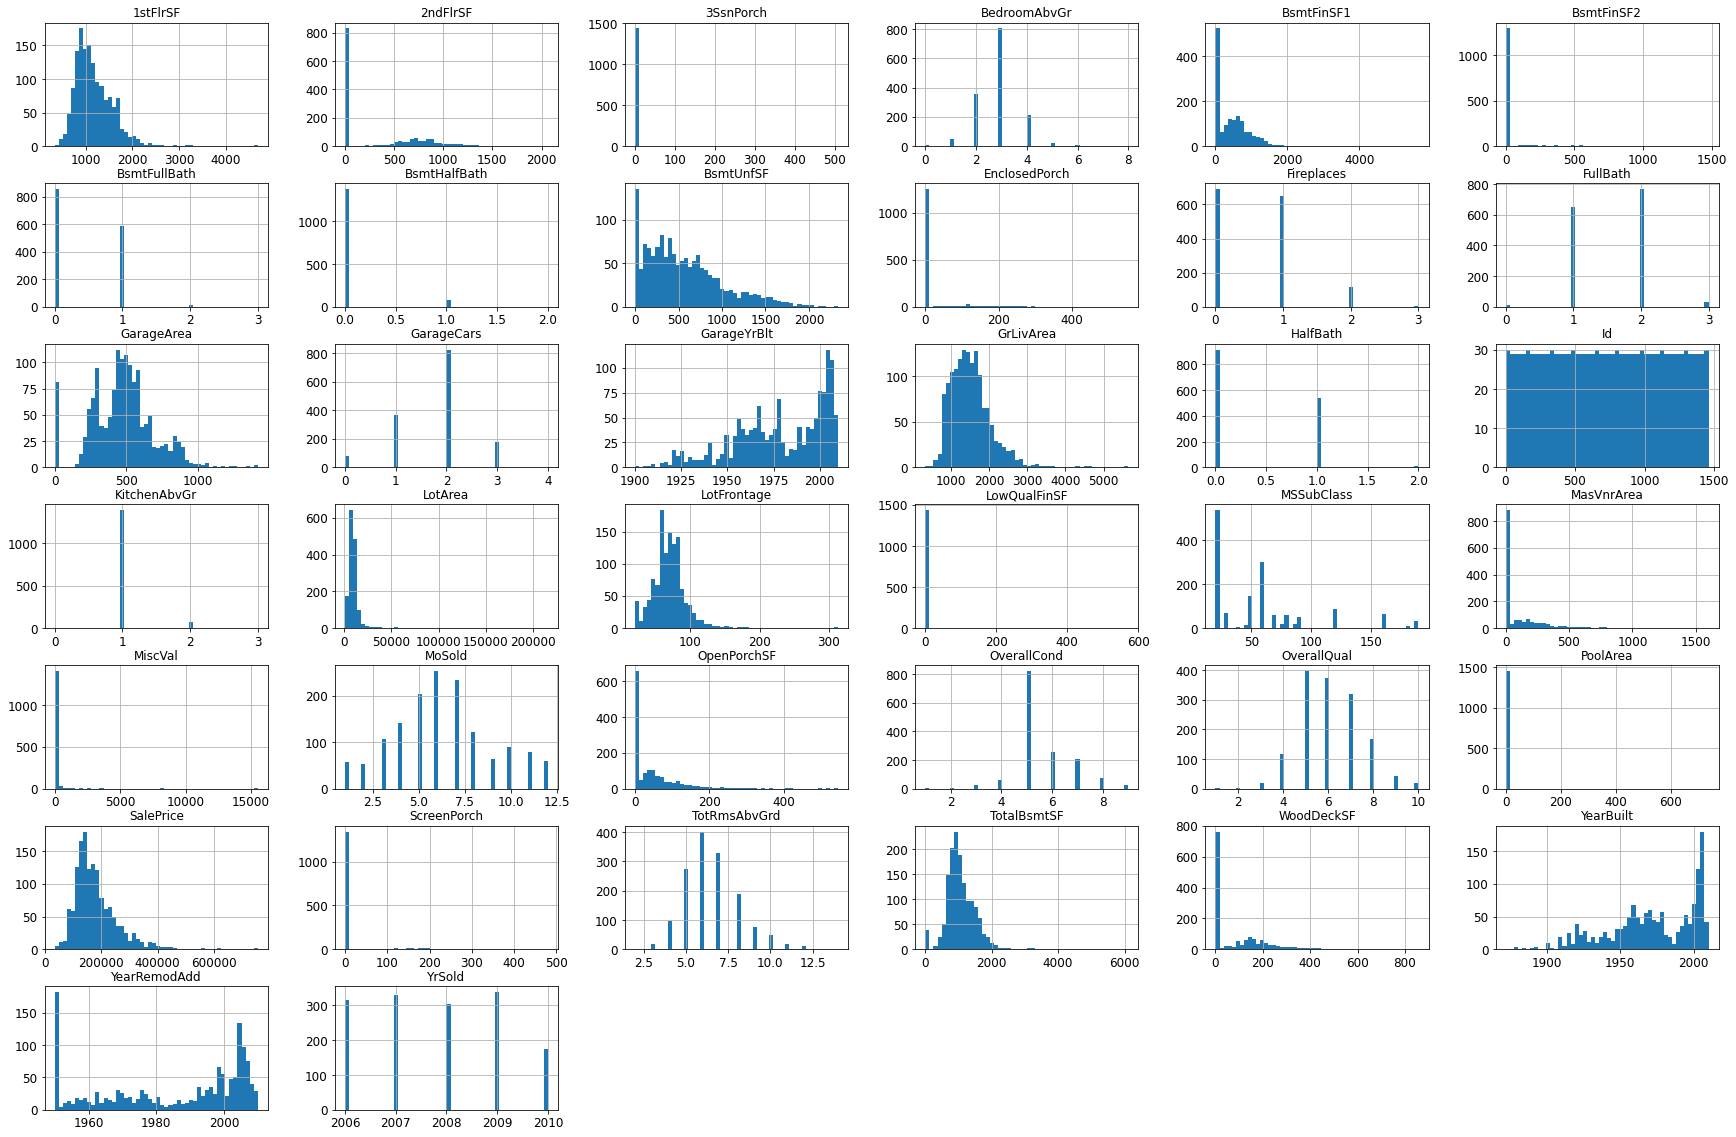

In [5]:
housing_data2.hist(bins=50, figsize=(30,20))

In [5]:
housing_num=housing_data[['LotFrontage','LotArea','MasVnrArea',
                          'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
                          '1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                          'GarageArea','WoodDeckSF','OpenPorchSF',
                          'EnclosedPorch','3SsnPorch','ScreenPorch',
                          'PoolArea','MiscVal','SalePrice']]

In [6]:
housing_num.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015BE9C25D30>,
      dtype=object)

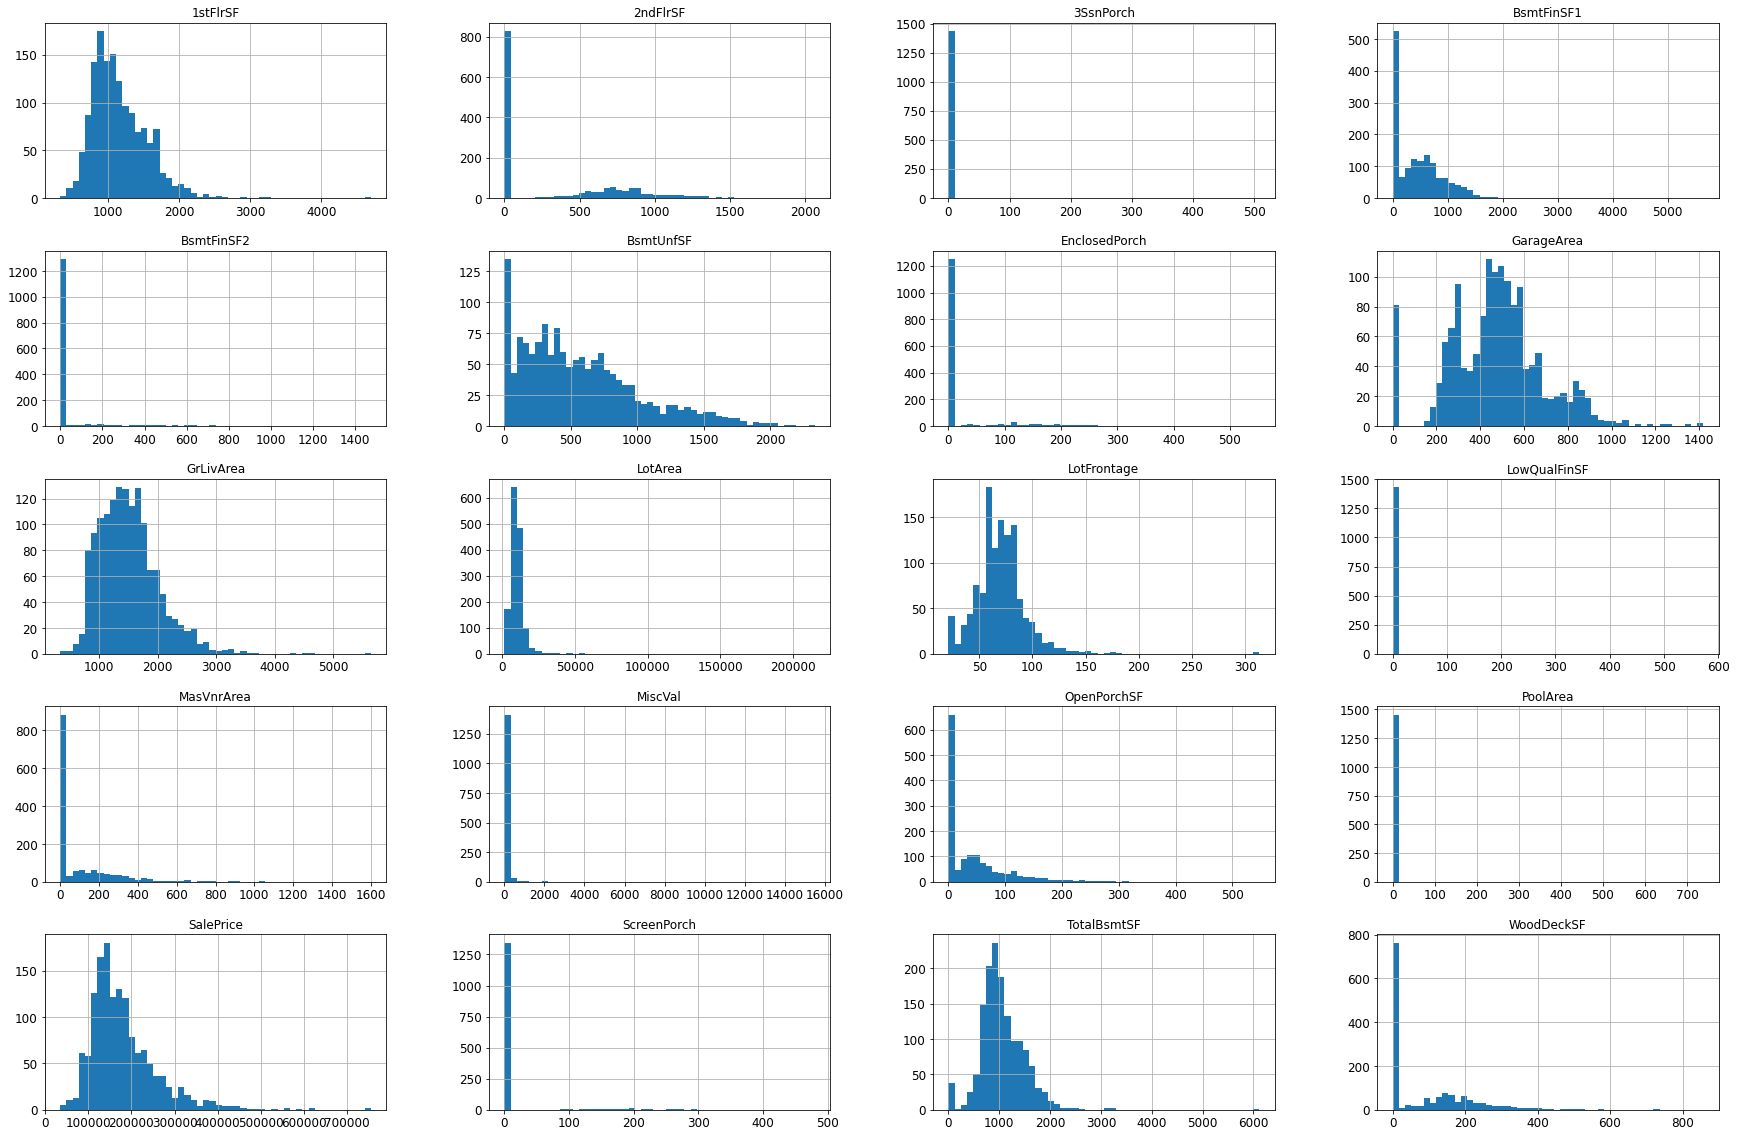

In [7]:
housing_num.hist(bins=50, figsize=(30,20))

In [8]:
housing_time=housing_data2[['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold']]

In [9]:
housing_data2.drop(['YearBuilt', 'YearRemodAdd','GarageYrBlt','MoSold', 'YrSold'], axis=1, inplace=True)

In [10]:
housing_data2.drop(['LotFrontage','LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','SalePrice'],axis=1, inplace=True)

In [11]:
housing_data2.drop('Id', axis=1, inplace=True)

In [12]:
housing_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

- Above list shows all the categorical data

In [13]:
housing_num.describe()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
max,313.000000,215245.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,755000.000000


- Above list shows the list of regressive attributes

In [14]:
housing_num.iloc[0:10,0:20]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
5,85.0,14115,0.0,732,0,64,796,796,566,0,1362,480,40,30,0,320,0,0,700,143000
6,75.0,10084,186.0,1369,0,317,1686,1694,0,0,1694,636,255,57,0,0,0,0,0,307000
7,NaN,10382,240.0,859,32,216,1107,1107,983,0,2090,484,235,204,228,0,0,0,350,200000
8,51.0,6120,0.0,0,0,952,952,1022,752,0,1774,468,90,0,205,0,0,0,0,129900
9,50.0,7420,0.0,851,0,140,991,1077,0,0,1077,205,0,4,0,0,0,0,0,118000


----------------------
- We should now substitute NaN values.
------------------------
- For numerical regressive, we should use Imputer method.

In [17]:
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(strategy='median')

In [18]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [19]:
imputer.statistics_

array([6.9000e+01, 9.4785e+03, 0.0000e+00, 3.8350e+02, 0.0000e+00,
       4.7750e+02, 9.9150e+02, 1.0870e+03, 0.0000e+00, 0.0000e+00,
       1.4640e+03, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6300e+05])

In [20]:
X=imputer.transform(housing_num)

In [508]:
housing_num_tr=pd.DataFrame(X,columns=housing_num.columns, index=housing_num.index)

In [509]:
housing_num_tr.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,80.0,9600.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,68.0,11250.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,60.0,9550.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,140000.0
4,84.0,14260.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


In [23]:
housing_time.head()

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
0,2003,2003,2003.0,2,2008
1,1976,1976,1976.0,5,2007
2,2001,2002,2001.0,9,2008
3,1915,1970,1998.0,2,2006
4,2000,2000,2000.0,12,2008


In [24]:
housing_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   GarageYrBlt   1379 non-null   float64
 3   MoSold        1460 non-null   int64  
 4   YrSold        1460 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 57.2 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BACF24F0>,
      dtype=object)

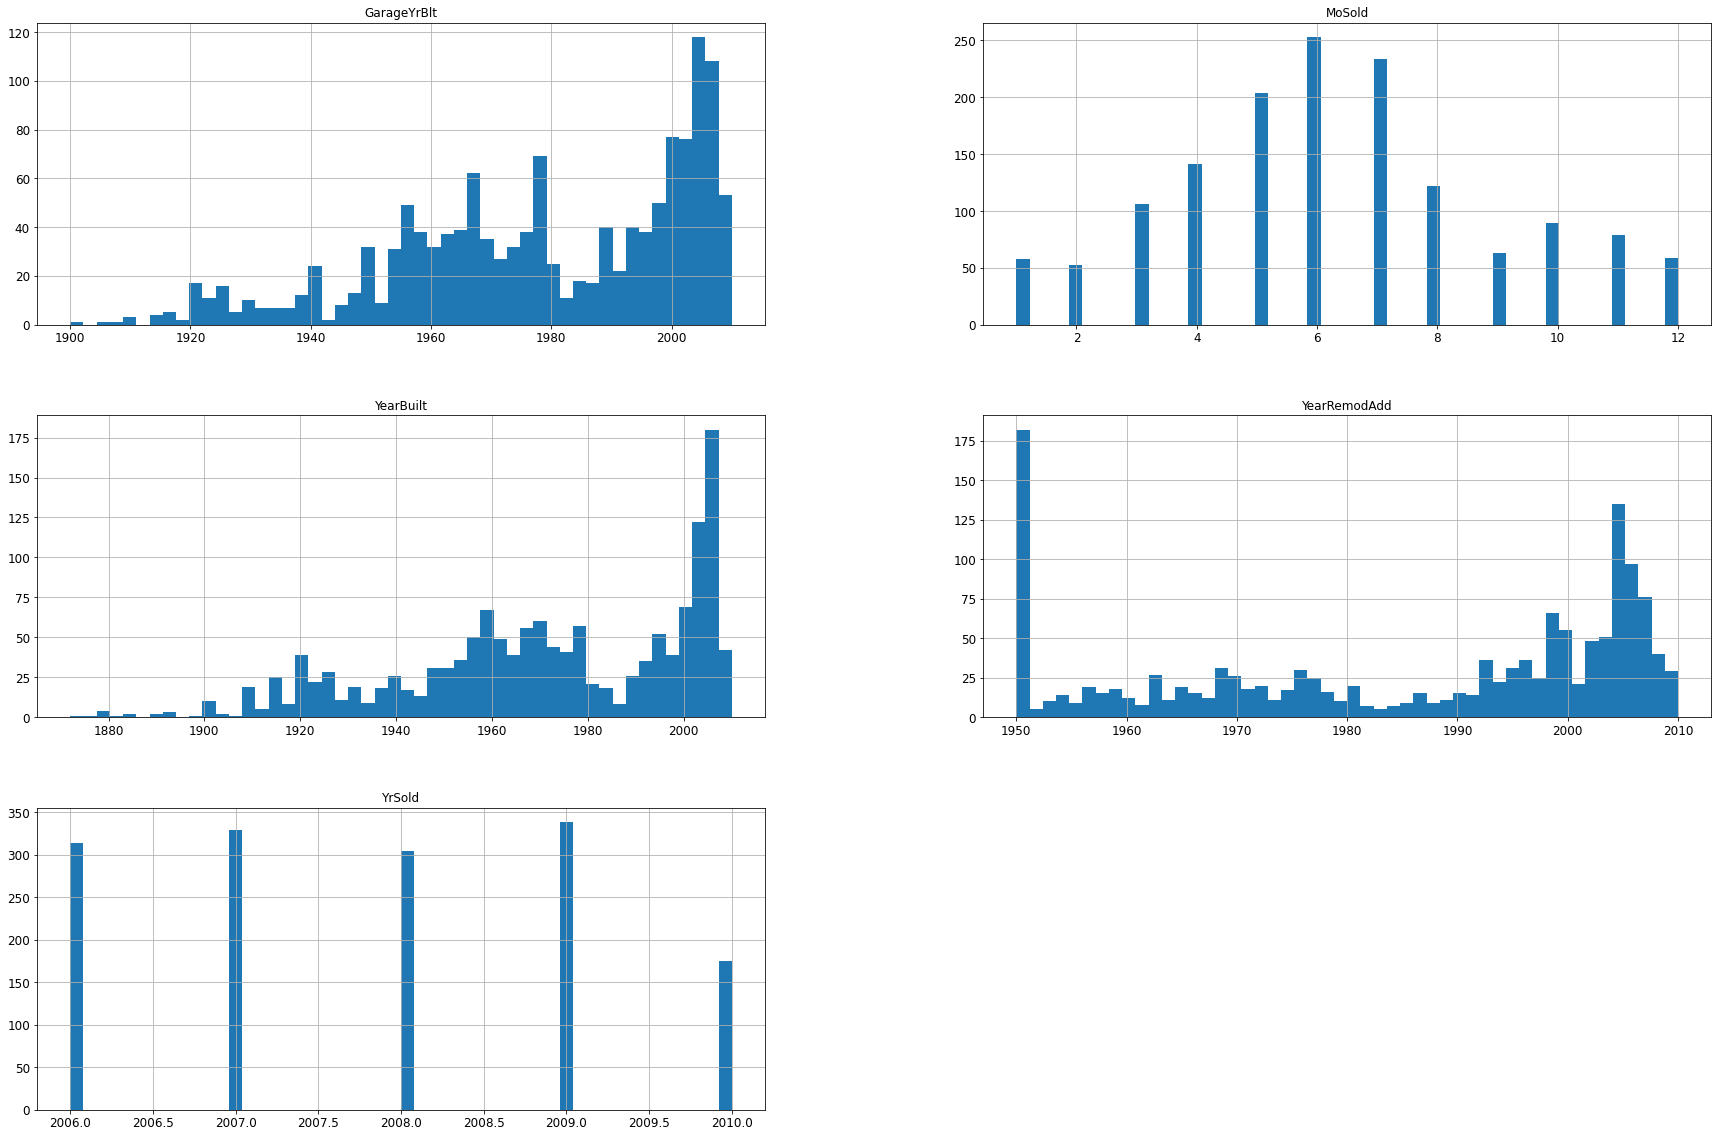

In [25]:
housing_time.hist(bins=50,figsize=(30,20))

In [26]:
housing_time['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1908.0     1
1927.0     1
1933.0     1
1900.0     1
1906.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [27]:
housing_time[housing_time.isnull().any(axis=1)]

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
39,1955,1955,NaN,6,2008
48,1920,2008,NaN,6,2009
78,1968,1968,NaN,4,2010
88,1915,1982,NaN,10,2009
89,1994,1995,NaN,8,2007
...,...,...,...,...,...
1349,1872,1987,NaN,12,2008
1407,1985,1985,NaN,3,2009
1449,1970,1970,NaN,8,2006
1450,1974,1974,NaN,9,2009


In [28]:
housing_time[30:50]

,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
30,1920,1950,1920.0,7,2008
31,1966,2006,1966.0,6,2008
32,2007,2007,2007.0,1,2008
33,1959,1959,1959.0,4,2010
34,2005,2005,2005.0,8,2007
35,2004,2005,2004.0,9,2006
36,1994,1995,1995.0,6,2009
37,1954,1990,1954.0,10,2009
38,1953,2007,1953.0,1,2010
39,1955,1955,NaN,6,2008


In [29]:
housing_data2.iloc[39:40,30:40]

,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual
39,TA,N,FuseP,0,0,2,0,2,2,Fa


In [38]:
housing_data2.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [41]:
garage=housing_data2[['YearBuilt', 'YearRemodAdd','GrLivArea','GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250BBD31C10>,
      dtype=object)

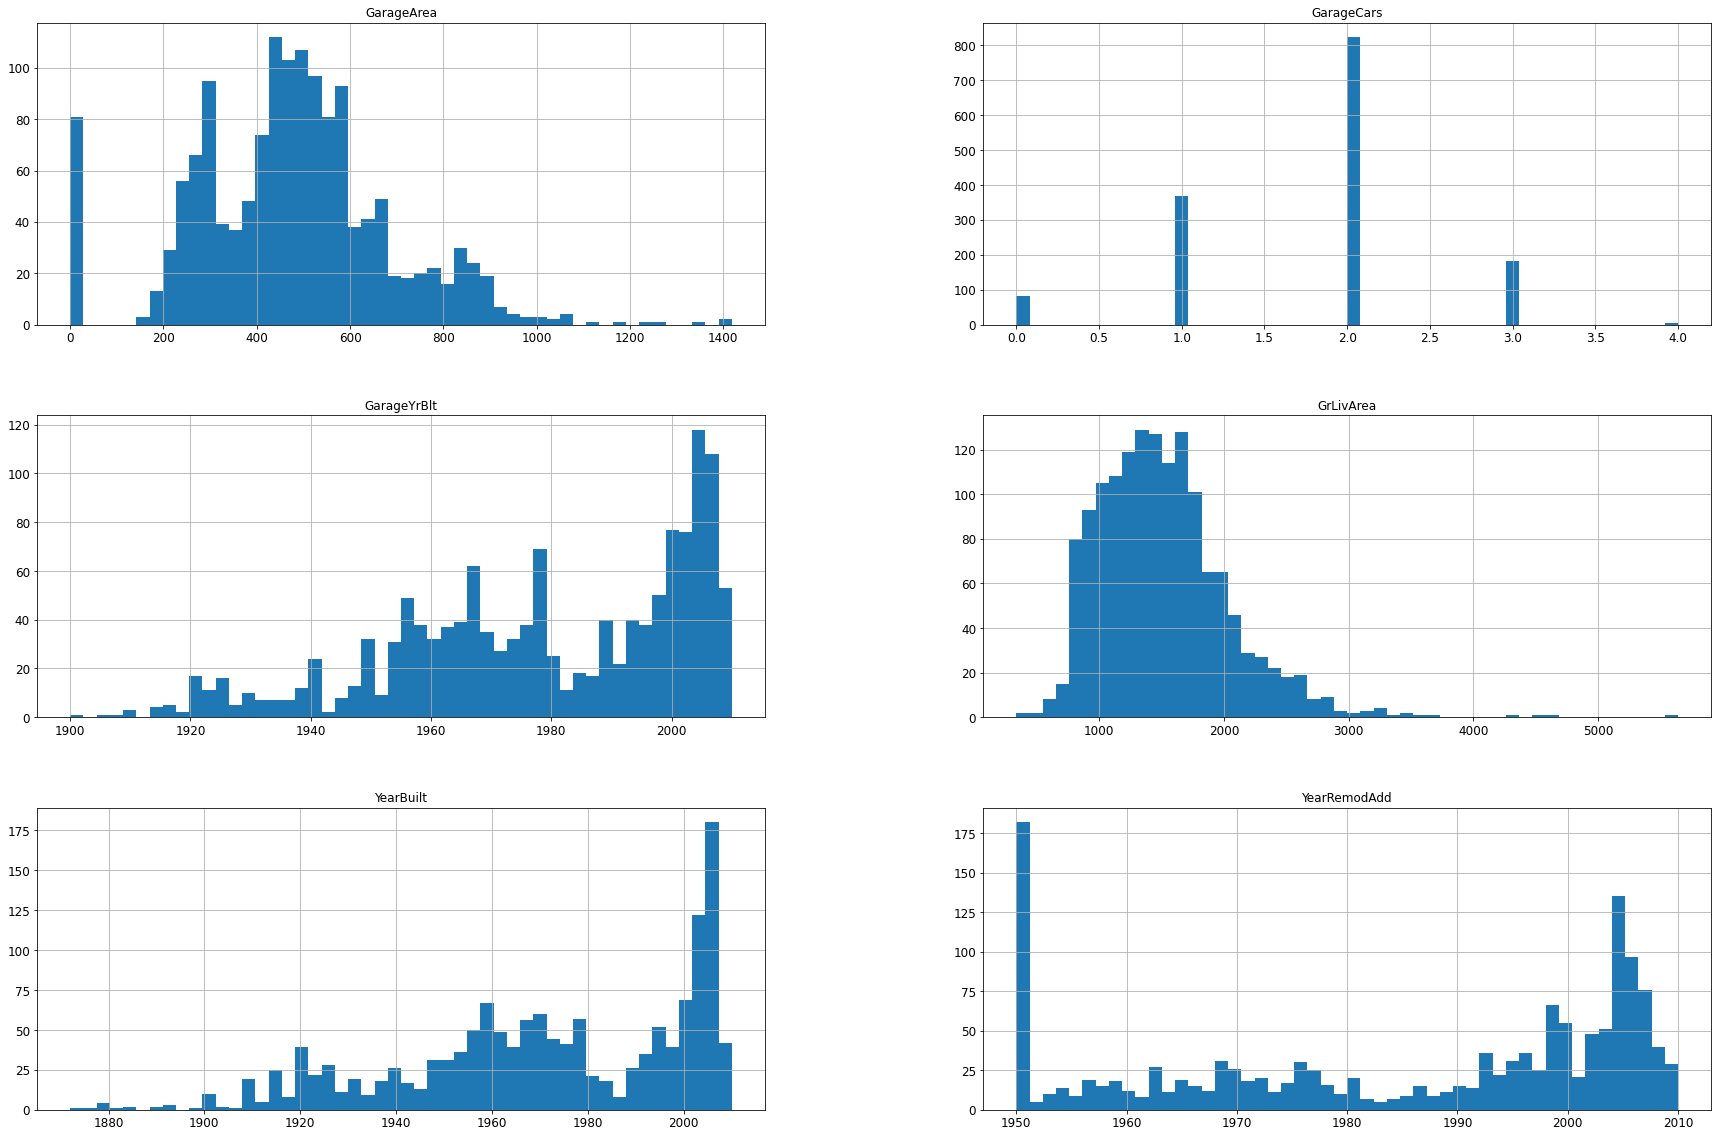

In [42]:
garage.hist(bins=50, figsize=(30,20))

In [45]:
garage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageType    1379 non-null   object 
 4   GarageYrBlt   1379 non-null   float64
 5   GarageFinish  1379 non-null   object 
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageQual    1379 non-null   object 
 9   GarageCond    1379 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 114.2+ KB


In [46]:
garage[garage.isnull().any(axis=1)][0:20]

,YearBuilt,YearRemodAdd,GrLivArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,1955,1955,1152,NaN,NaN,NaN,0,0,NaN,NaN
48,1920,2008,1452,NaN,NaN,NaN,0,0,NaN,NaN
78,1968,1968,1768,NaN,NaN,NaN,0,0,NaN,NaN
88,1915,1982,1526,NaN,NaN,NaN,0,0,NaN,NaN
89,1994,1995,990,NaN,NaN,NaN,0,0,NaN,NaN
99,1959,1959,1225,NaN,NaN,NaN,0,0,NaN,NaN
108,1919,2005,1517,NaN,NaN,NaN,0,0,NaN,NaN
125,1935,1982,754,NaN,NaN,NaN,0,0,NaN,NaN
127,1930,1950,840,NaN,NaN,NaN,0,0,NaN,NaN
140,1971,1971,864,NaN,NaN,NaN,0,0,NaN,NaN


In [47]:
corr_matrix=garage[['YearBuilt','YearRemodAdd','GarageYrBlt']].corr()

In [48]:
corr_matrix

,YearBuilt,YearRemodAdd,GarageYrBlt
YearBuilt,1.000000,0.592855,0.825667
YearRemodAdd,0.592855,1.000000,0.642277
GarageYrBlt,0.825667,0.642277,1.000000


- To fill the *GarageYrBlt*, we can see that this attributes is positively correlated with *YearBuilt*.
    - So, we can fill the NaN values accordingly from *YearBuilt*.

In [49]:
((81*0.825667)+(81*0.642277))/81

1.4679440000000001

In [50]:
(81*0.825667)

66.87902700000001

In [51]:
(81*0.642277)

52.024437

In [52]:
garage.head()

,YearBuilt,YearRemodAdd,GrLivArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
0,2003,2003,1710,Attchd,2003.0,RFn,2,548,TA,TA
1,1976,1976,1262,Attchd,1976.0,RFn,2,460,TA,TA
2,2001,2002,1786,Attchd,2001.0,RFn,2,608,TA,TA
3,1915,1970,1717,Detchd,1998.0,Unf,3,642,TA,TA
4,2000,2000,2198,Attchd,2000.0,RFn,3,836,TA,TA


In [53]:
def cnt(sample):
    count=0
    for i in range(len(sample)):
        print('YearBuilt:  {}'.format(sample['YearBuilt'][i]))
        if sample['YearBuilt'][i]==sample['GarageYrBlt'][i]:
            print('GarageYearBuilt:  {}'.format(sample['GarageYrBlt'][i]))
            count=count+1
            print('Count Increased by 1:  {}'.format(count))
            
            
    return count
        
        
    

In [54]:
garage['YearBuilt'][20]

2005

In [55]:
c=cnt(garage)

YearBuilt:  2003
GarageYearBuilt:  2003.0
Count Increased by 1:  1
YearBuilt:  1976
GarageYearBuilt:  1976.0
Count Increased by 1:  2
YearBuilt:  2001
GarageYearBuilt:  2001.0
Count Increased by 1:  3
YearBuilt:  1915
YearBuilt:  2000
GarageYearBuilt:  2000.0
Count Increased by 1:  4
YearBuilt:  1993
GarageYearBuilt:  1993.0
Count Increased by 1:  5
YearBuilt:  2004
GarageYearBuilt:  2004.0
Count Increased by 1:  6
YearBuilt:  1973
GarageYearBuilt:  1973.0
Count Increased by 1:  7
YearBuilt:  1931
GarageYearBuilt:  1931.0
Count Increased by 1:  8
YearBuilt:  1939
GarageYearBuilt:  1939.0
Count Increased by 1:  9
YearBuilt:  1965
GarageYearBuilt:  1965.0
Count Increased by 1:  10
YearBuilt:  2005
GarageYearBuilt:  2005.0
Count Increased by 1:  11
YearBuilt:  1962
GarageYearBuilt:  1962.0
Count Increased by 1:  12
YearBuilt:  2006
GarageYearBuilt:  2006.0
Count Increased by 1:  13
YearBuilt:  1960
GarageYearBuilt:  1960.0
Count Increased by 1:  14
YearBuilt:  1929
YearBuilt:  1970
Garage

GarageYearBuilt:  2006.0
Count Increased by 1:  477
YearBuilt:  2003
GarageYearBuilt:  2003.0
Count Increased by 1:  478
YearBuilt:  2001
GarageYearBuilt:  2001.0
Count Increased by 1:  479
YearBuilt:  1972
GarageYearBuilt:  1972.0
Count Increased by 1:  480
YearBuilt:  1969
GarageYearBuilt:  1969.0
Count Increased by 1:  481
YearBuilt:  2009
GarageYearBuilt:  2009.0
Count Increased by 1:  482
YearBuilt:  1971
YearBuilt:  1950
GarageYearBuilt:  1950.0
Count Increased by 1:  483
YearBuilt:  1953
GarageYearBuilt:  1953.0
Count Increased by 1:  484
YearBuilt:  1966
GarageYearBuilt:  1966.0
Count Increased by 1:  485
YearBuilt:  1970
YearBuilt:  2007
GarageYearBuilt:  2007.0
Count Increased by 1:  486
YearBuilt:  1940
GarageYearBuilt:  1940.0
Count Increased by 1:  487
YearBuilt:  1996
GarageYearBuilt:  1996.0
Count Increased by 1:  488
YearBuilt:  1906
GarageYearBuilt:  1906.0
Count Increased by 1:  489
YearBuilt:  1995
GarageYearBuilt:  1995.0
Count Increased by 1:  490
YearBuilt:  1971


Count Increased by 1:  928
YearBuilt:  2003
GarageYearBuilt:  2003.0
Count Increased by 1:  929
YearBuilt:  2004
GarageYearBuilt:  2004.0
Count Increased by 1:  930
YearBuilt:  2005
GarageYearBuilt:  2005.0
Count Increased by 1:  931
YearBuilt:  2006
GarageYearBuilt:  2006.0
Count Increased by 1:  932
YearBuilt:  2003
GarageYearBuilt:  2003.0
Count Increased by 1:  933
YearBuilt:  2007
GarageYearBuilt:  2007.0
Count Increased by 1:  934
YearBuilt:  1974
GarageYearBuilt:  1974.0
Count Increased by 1:  935
YearBuilt:  2006
GarageYearBuilt:  2006.0
Count Increased by 1:  936
YearBuilt:  1929
YearBuilt:  1984
GarageYearBuilt:  1984.0
Count Increased by 1:  937
YearBuilt:  2005
GarageYearBuilt:  2005.0
Count Increased by 1:  938
YearBuilt:  1976
GarageYearBuilt:  1976.0
Count Increased by 1:  939
YearBuilt:  1917
YearBuilt:  1950
GarageYearBuilt:  1950.0
Count Increased by 1:  940
YearBuilt:  1968
GarageYearBuilt:  1968.0
Count Increased by 1:  941
YearBuilt:  2003
GarageYearBuilt:  2003.0


- Out of 1379 values, 1089 values have same GarageYrBlt as that of HouseBlt.
- Also, YrBlt is highly correlated with GarageYrBLt, so we should fill the NaN values, with YrBlt.

In [56]:
garage[garage.isnull().any(axis=1)]

,YearBuilt,YearRemodAdd,GrLivArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,1955,1955,1152,NaN,NaN,NaN,0,0,NaN,NaN
48,1920,2008,1452,NaN,NaN,NaN,0,0,NaN,NaN
78,1968,1968,1768,NaN,NaN,NaN,0,0,NaN,NaN
88,1915,1982,1526,NaN,NaN,NaN,0,0,NaN,NaN
89,1994,1995,990,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1349,1872,1987,2358,NaN,NaN,NaN,0,0,NaN,NaN
1407,1985,1985,833,NaN,NaN,NaN,0,0,NaN,NaN
1449,1970,1970,630,NaN,NaN,NaN,0,0,NaN,NaN
1450,1974,1974,1792,NaN,NaN,NaN,0,0,NaN,NaN


In [57]:
samp=garage[['GarageYrBlt']]

In [58]:
samp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   GarageYrBlt  1379 non-null   float64
dtypes: float64(1)
memory usage: 11.5 KB


In [59]:
ind=list(samp[samp.isnull().any(axis=1)].index)

In [60]:
len(ind)

81

Below function helps us to fill the NaN values in **GarageYrBlt** attribute.

- As it it time series data, here we have found that *GarageYrBlt* is positively correlated with *YearBuilt*.
    - Therefore, we have replaced the NaN values with that of *YearBuilt* value of same row.
-----

In [61]:
def fillingNA(data,sample,ind):
    for i in range(len(ind)):
        sample[ind[i]:ind[i]+1]=data[['YearBuilt']][ind[i]:ind[i]+1]
    return sample

In [62]:
s=fillingNA(housing_data,samp,ind)

<ipython-input-61-5c5d8e6ccb7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample[ind[i]:ind[i]+1]=data[['YearBuilt']][ind[i]:ind[i]+1]
c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:2945: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer(key, value)
c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:2930: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

In [63]:
garage[['GarageYrBlt']]=s

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [64]:
garage[garage.isnull().any(axis=1)]

,YearBuilt,YearRemodAdd,GrLivArea,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,1955,1955,1152,NaN,1955.0,NaN,0,0,NaN,NaN
48,1920,2008,1452,NaN,1920.0,NaN,0,0,NaN,NaN
78,1968,1968,1768,NaN,1968.0,NaN,0,0,NaN,NaN
88,1915,1982,1526,NaN,1915.0,NaN,0,0,NaN,NaN
89,1994,1995,990,NaN,1994.0,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1349,1872,1987,2358,NaN,1872.0,NaN,0,0,NaN,NaN
1407,1985,1985,833,NaN,1985.0,NaN,0,0,NaN,NaN
1449,1970,1970,630,NaN,1970.0,NaN,0,0,NaN,NaN
1450,1974,1974,1792,NaN,1974.0,NaN,0,0,NaN,NaN


In [65]:
corr_matrix=garage.corr()

In [2]:
corr_matrix

NameError: name 'corr_matrix' is not defined

- Now, *GarageType, GarageFinish, GarageQual, GarageCond* are four categorical attributes, left that contains NaN values.
- To fill these, we should maintain the existing proportions of various categories already present in the attribute.
-------

----------------
#### Function to fill NaN values:
 - For categorical attribute, maintaining the existing proportions.
 - **sample**   : Columns containing NaN value
 - **ind**  : Index number for NaN value
 - **fi**   : Data to be filled
 - **ti**   : count of each data to be filled
----------
- It will return the pandas Series, with their NaN values suitably been replaced.
-----

In [154]:
def fillingNAcat(sample,ind,fi,ti):
    k=0
    for i in range(len(fi)):
        for j in range(int(ti[i])):
          
            print('NaN row Index no. : {}'.format(ind[j+k]))
            sample[ind[j+k]:ind[j+k]+1]=fi[i]
            print('NaN filled with : {}'.format(fi[i]))
        if ti[i]==0:
            k=k
        else:
            k=j+k+1
    return (sample)

def NAfiller(sample):
    print('*'*30)
    print('*'*30)
    print('*'*30)
    sample2=pd.DataFrame(sample)
    ti=sample.value_counts()
    print('\tCategories and Count:')
    print(ti)
    ti=list(sample.value_counts())
    print('*'*30)
    print('*'*30)
    s=sum(ti)  # Total number of Non-NaN values
    print('\tTotal number of Non-NaN values: {}'.format(s))
    print('*'*30)
    print('*'*30)
    print('\tProportions of respective categories: ')
    for i in range(len(ti)):
        ti[i]=ti[i]/s
    print(ti)
    print('*'*30)
    print('*'*30)
    fi=list(sample.value_counts().index)
    print('\tCategories with NaN values: ')
    print(fi)
    print('*'*30)
    print('*'*30)
    t=(len(sample)-s) # Total number of Nan Values
    print('\tTotal Number of NaN values: {}'.format(t))
    print('*'*30)
    print('*'*30)
    print('\tCount for which each variable is to be filled: ')
    for i in range(len(ti)):
        ti[i]=np.ceil(ti[i]*t)
    print(ti)
    print('*'*30)
    print('*'*30)
    if (int(t)> int(sum(ti)))==False:
        print('NaN value to be filled is greater than NaN value present:{}'
          .format(t<sum(ti)))
        diff=sum(ti)-t
        print('diff: {}'.format(diff))
        i=0
        while diff!=0:
            ti[i]=ti[i]-1
            i=i+1
            diff=diff-1
    print(ti)
    print('*'*30)
    print('*'*30)
    ind=list(sample2[sample2.isnull().any(axis=1)].index)
    print('Index of NaN rows: ')
    print(ind)
    print('*'*30)
    print('*'*30)
    sample2=fillingNAcat(sample2,ind,fi,ti)
    print('*'*30)
    print('*'*30)
    print('*'*30)
    
    return sample2

In [87]:
s=NAfiller(garage['GarageFinish'])

******************************
******************************
******************************
	Categories and Count:
Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1379
******************************
******************************
	Proportions of respective categories: 
[0.43872371283538797, 0.3060188542422045, 0.25525743292240755]
******************************
******************************
	Categories with NaN values: 
['Unf', 'RFn', 'Fin']
******************************
******************************
	Total Number of NaN values: 81
******************************
******************************
	Count for which each variable is to be filled: 
[36.0, 25.0, 21.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 1.0
[35.0, 25.0, 21.0]
******************************
******************************


In [98]:
garage['GarageFinish'].value_counts()

Unf    640
RFn    447
Fin    373
Name: GarageFinish, dtype: int64

In [99]:
garage['GarageFinish'] = s

<ipython-input-99-fe07ec8f5d34>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garage['GarageFinish'] = s


In [106]:
garage['GarageFinish'].value_counts() / 1460

Unf    0.438356
RFn    0.306164
Fin    0.255479
Name: GarageFinish, dtype: float64

--------

In [133]:
s=NAfiller(garage['GarageQual'])

******************************
******************************
******************************
	Categories and Count:
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1379
******************************
******************************
	Proportions of respective categories: 
[0.9506889050036258, 0.03480783176214648, 0.01015228426395939, 0.002175489485134155, 0.002175489485134155]
******************************
******************************
	Categories with NaN values: 
['TA', 'Fa', 'Gd', 'Ex', 'Po']
******************************
******************************
	Total Number of NaN values: 81
******************************
******************************
	Count for which each variable is to be filled: 
[78.0, 3.0, 1.0, 1.0, 1.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 3.0


In [135]:
garage['GarageQual']=s

<ipython-input-135-5f5ba9128ab4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garage['GarageQual']=s


In [139]:
garage['GarageQual'].value_counts() / len(garage)

TA    0.950685
Fa    0.034247
Gd    0.009589
Ex    0.002740
Po    0.002740
Name: GarageQual, dtype: float64

-------------------

In [157]:
s=garage['GarageCond']

In [142]:
s=NAfiller(garage['GarageCond'])

******************************
******************************
******************************
	Categories and Count:
TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1379
******************************
******************************
	Proportions of respective categories: 
[0.9615663524292966, 0.025380710659898477, 0.006526468455402465, 0.005076142131979695, 0.0014503263234227702]
******************************
******************************
	Categories with NaN values: 
['TA', 'Fa', 'Gd', 'Po', 'Ex']
******************************
******************************
	Total Number of NaN values: 81
******************************
******************************
	Count for which each variable is to be filled: 
[78.0, 3.0, 1.0, 1.0, 1.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 3

In [158]:
garage['GarageCond']=s

<ipython-input-158-a9102c2e9531>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garage['GarageCond']=s


In [159]:
garage['GarageCond'].value_counts() / 1460

TA    0.960959
Fa    0.025342
Gd    0.006164
Po    0.005479
Ex    0.002055
Name: GarageCond, dtype: float64

-------------------

In [160]:
garage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   GrLivArea     1460 non-null   int64  
 3   GarageType    1460 non-null   object 
 4   GarageYrBlt   1460 non-null   float64
 5   GarageFinish  1460 non-null   object 
 6   GarageCars    1460 non-null   int64  
 7   GarageArea    1460 non-null   int64  
 8   GarageQual    1460 non-null   object 
 9   GarageCond    1460 non-null   object 
dtypes: float64(1), int64(5), object(4)
memory usage: 114.2+ KB


- All the missing values related to Garage attribute, have been filled suitably.
-----------

In [257]:
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   object 
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  GarageArea     1460 non-null   int64  
 12  WoodDeckSF     1460 non-null   int64  
 13  OpenPorchSF    1460 non-null   int64  
 14  EnclosedPorch  1460 non-null   int64  
 15  3SsnPorch      1460 non-null   int64  
 16  ScreenPorch    1460 non-null   int64  
 17  PoolArea       1460 non-null   int64  
 18  MiscVal 

In [258]:
housing_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1460 non-null   int64  
 1   YearRemodAdd  1460 non-null   int64  
 2   GarageYrBlt   1460 non-null   float64
 3   MoSold        1460 non-null   int64  
 4   YrSold        1460 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 57.2 KB


In [259]:
housing_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   Street         1460 non-null   object
 3   Alley          91 non-null     object
 4   LotShape       1460 non-null   object
 5   LandContour    1460 non-null   object
 6   Utilities      1460 non-null   object
 7   LotConfig      1460 non-null   object
 8   LandSlope      1460 non-null   object
 9   Neighborhood   1460 non-null   object
 10  Condition1     1460 non-null   object
 11  Condition2     1460 non-null   object
 12  BldgType       1460 non-null   object
 13  HouseStyle     1460 non-null   object
 14  OverallQual    1460 non-null   int64 
 15  OverallCond    1460 non-null   int64 
 16  RoofStyle      1460 non-null   object
 17  RoofMatl       1460 non-null   object
 18  Exterior1st    1460 non-null

In [260]:
housing_data2[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]=garage[['YearBuilt', 'YearRemodAdd', 'GrLivArea', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']]

In [261]:
housing_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 60 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   Street         1460 non-null   object 
 3   Alley          91 non-null     object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  RoofStyle      1460 non-null   object 
 17  RoofMatl       1460 non-null   object 
 18  Exterior

In [262]:
print(housing_data2.isnull().sum())

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType          0
GarageFini

- **Attributes** : *Alley , FireplaceQu, PoolQC, Fence, MiscFeature*, have more than 50% as NaN values, so it would be better to remove these attributes completely rather than filling the missing values.
- **Attributes** : *MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical* , have little values as NaN, we should fill these accordingly.

In [263]:
housing_data2.drop(['Alley' , 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'],
                  axis=1, inplace=True)

In [264]:
housing_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 55 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   Street         1460 non-null   object 
 3   LotShape       1460 non-null   object 
 4   LandContour    1460 non-null   object 
 5   Utilities      1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   LandSlope      1460 non-null   object 
 8   Neighborhood   1460 non-null   object 
 9   Condition1     1460 non-null   object 
 10  Condition2     1460 non-null   object 
 11  BldgType       1460 non-null   object 
 12  HouseStyle     1460 non-null   object 
 13  OverallQual    1460 non-null   int64  
 14  OverallCond    1460 non-null   int64  
 15  RoofStyle      1460 non-null   object 
 16  RoofMatl       1460 non-null   object 
 17  Exterior1st    1460 non-null   object 
 18  Exterior

In [265]:
housing_data2.isnull().sum()

MSSubClass        0
MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
GarageType        0
GarageFinish      0
GarageCars        0
GarageQual        0
GarageCond        0
PavedDrive        0
SaleType          0
SaleCondition     0


In [266]:
housing_data2['BsmtQual'].value_counts() / (649+618+121+35)

TA    0.456079
Gd    0.434294
Ex    0.085032
Fa    0.024596
Name: BsmtQual, dtype: float64

In [267]:
s=housing_data2['BsmtQual']

In [268]:
s=NAfiller(housing_data2['BsmtQual'])

******************************
******************************
******************************
	Categories and Count:
TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1423
******************************
******************************
	Proportions of respective categories: 
[0.4560787069571328, 0.4342937456078707, 0.08503162333099086, 0.024595924104005622]
******************************
******************************
	Categories with NaN values: 
['TA', 'Gd', 'Ex', 'Fa']
******************************
******************************
	Total Number of NaN values: 37
******************************
******************************
	Count for which each variable is to be filled: 
[17.0, 17.0, 4.0, 1.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 2.0
[16.0, 16.0, 4.0, 1.0]
***************************

In [269]:
housing_data2['BsmtQual']=s

In [270]:
housing_data2['BsmtQual'].value_counts() / 1460

TA    0.455479
Gd    0.434247
Ex    0.085616
Fa    0.024658
Name: BsmtQual, dtype: float64

--------------

In [271]:
s=NAfiller(housing_data2['BsmtCond'])

******************************
******************************
******************************
	Categories and Count:
TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1423
******************************
******************************
	Proportions of respective categories: 
[0.921293042867182, 0.04567814476458187, 0.03162333099086437, 0.0014054813773717498]
******************************
******************************
	Categories with NaN values: 
['TA', 'Gd', 'Fa', 'Po']
******************************
******************************
	Total Number of NaN values: 37
******************************
******************************
	Count for which each variable is to be filled: 
[35.0, 2.0, 2.0, 1.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 3.0
[34.0, 1.0, 1.0, 1.0]
************************

In [272]:
housing_data2['BsmtCond']=s

In [273]:
housing_data2['BsmtCond'].value_counts()  / 1460

TA    0.921233
Gd    0.045205
Fa    0.031507
Po    0.002055
Name: BsmtCond, dtype: float64

-------------

In [274]:
s=NAfiller(housing_data2['BsmtExposure'])

******************************
******************************
******************************
	Categories and Count:
No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1422
******************************
******************************
	Proportions of respective categories: 
[0.670182841068917, 0.15541490857946555, 0.09423347398030943, 0.08016877637130802]
******************************
******************************
	Categories with NaN values: 
['No', 'Av', 'Gd', 'Mn']
******************************
******************************
	Total Number of NaN values: 38
******************************
******************************
	Count for which each variable is to be filled: 
[26.0, 6.0, 4.0, 4.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 2.0
[25.0, 5.0, 4.0, 4.0]
**************************

In [275]:
housing_data2['BsmtExposure']=s

In [276]:
housing_data2['BsmtExposure'].value_counts() / 1460

No    0.669863
Av    0.154795
Gd    0.094521
Mn    0.080822
Name: BsmtExposure, dtype: float64

------------

In [277]:
s=housing_data2['BsmtFinType1']

In [278]:
s=NAfiller(housing_data2['BsmtFinType1'])

******************************
******************************
******************************
	Categories and Count:
Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1423
******************************
******************************
	Proportions of respective categories: 
[0.3021784961349262, 0.2937456078706957, 0.15460295151089248, 0.10400562192550948, 0.09346451159522136, 0.05200281096275474]
******************************
******************************
	Categories with NaN values: 
['Unf', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ']
******************************
******************************
	Total Number of NaN values: 37
******************************
******************************
	Count for which each variable is to be filled: 
[12.0, 11.0, 6.0, 4.0, 4.0, 2.0]
******************************
******************************
NaN value to be filled 

In [279]:
housing_data2['BsmtFinType1']=s

In [280]:
housing_data2['BsmtFinType1'].value_counts()  / 1460

Unf    0.302055
GLQ    0.293151
ALQ    0.154795
BLQ    0.104110
Rec    0.093836
LwQ    0.052055
Name: BsmtFinType1, dtype: float64

--------------

In [281]:
s=NAfiller(housing_data2['BsmtFinType2'])

******************************
******************************
******************************
	Categories and Count:
Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1422
******************************
******************************
	Proportions of respective categories: 
[0.8832630098452883, 0.0379746835443038, 0.03234880450070324, 0.023206751054852322, 0.013361462728551337, 0.009845288326300985]
******************************
******************************
	Categories with NaN values: 
['Unf', 'Rec', 'LwQ', 'BLQ', 'ALQ', 'GLQ']
******************************
******************************
	Total Number of NaN values: 38
******************************
******************************
	Count for which each variable is to be filled: 
[34.0, 2.0, 2.0, 1.0, 1.0, 1.0]
******************************
******************************
NaN value to be

In [282]:
housing_data2['BsmtFinType2']=s

In [283]:
housing_data2['BsmtFinType2'].value_counts() / 1460

Unf    0.882877
Rec    0.037671
LwQ    0.032192
BLQ    0.023288
ALQ    0.013699
GLQ    0.010274
Name: BsmtFinType2, dtype: float64

--------------

In [284]:
s=NAfiller(housing_data2['Electrical'])

******************************
******************************
******************************
	Categories and Count:
SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1459
******************************
******************************
	Proportions of respective categories: 
[0.914324880054832, 0.06442769019876628, 0.018505825908156272, 0.00205620287868403, 0.0006854009595613434]
******************************
******************************
	Categories with NaN values: 
['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix']
******************************
******************************
	Total Number of NaN values: 1
******************************
******************************
	Count for which each variable is to be filled: 
[1.0, 1.0, 1.0, 1.0, 1.0]
******************************
******************************
NaN value to be filled is greater than NaN val

In [285]:
housing_data2['Electrical'] =s

In [286]:
housing_data2['Electrical'].value_counts() / 1460

SBrkr    0.913699
FuseA    0.064384
FuseF    0.018493
FuseP    0.002055
Mix      0.001370
Name: Electrical, dtype: float64

---------------------------

In [287]:
s=NAfiller(housing_data2['MasVnrType'])

******************************
******************************
******************************
	Categories and Count:
None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
******************************
******************************
	Total number of Non-NaN values: 1452
******************************
******************************
	Proportions of respective categories: 
[0.5950413223140496, 0.30647382920110194, 0.0881542699724518, 0.010330578512396695]
******************************
******************************
	Categories with NaN values: 
['None', 'BrkFace', 'Stone', 'BrkCmn']
******************************
******************************
	Total Number of NaN values: 8
******************************
******************************
	Count for which each variable is to be filled: 
[5.0, 3.0, 1.0, 1.0]
******************************
******************************
NaN value to be filled is greater than NaN value present:True
diff: 2.0
[4.0, 2.0, 1.0, 1

In [288]:
housing_data2['MasVnrType']=s

In [289]:
housing_data2['MasVnrType'].value_counts()  / 1460

None       0.594521
BrkFace    0.306164
Stone      0.088356
BrkCmn     0.010959
Name: MasVnrType, dtype: float64

---------------

In [290]:
housing_data2.isnull().sum()

MSSubClass       0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageFinish     0
GarageCars       0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
YearBuilt        0
YearRemodAdd     0
GrLivArea   

- No null values are present now.

-----------------

In [291]:
housing_num_tr.isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
SalePrice        0
dtype: int64

- Now we have replaced all the NaN values.

In [340]:
housing=[housing_num_tr, housing_data2]

In [341]:
housing=pd.concat(housing, axis=1)

In [342]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1460 non-null   float64
 1   LotArea        1460 non-null   float64
 2   MasVnrArea     1460 non-null   float64
 3   BsmtFinSF1     1460 non-null   float64
 4   BsmtFinSF2     1460 non-null   float64
 5   BsmtUnfSF      1460 non-null   float64
 6   TotalBsmtSF    1460 non-null   float64
 7   1stFlrSF       1460 non-null   float64
 8   2ndFlrSF       1460 non-null   float64
 9   LowQualFinSF   1460 non-null   float64
 10  WoodDeckSF     1460 non-null   float64
 11  OpenPorchSF    1460 non-null   float64
 12  EnclosedPorch  1460 non-null   float64
 13  3SsnPorch      1460 non-null   float64
 14  ScreenPorch    1460 non-null   float64
 15  PoolArea       1460 non-null   float64
 16  MiscVal        1460 non-null   float64
 17  SalePrice      1460 non-null   float64
 18  MSSubCla

- Now as we have filled all the NaN values, we should now separate our test data and train data.
- We should do stratified shuffling based on highest correlated attribute.
----------------

In [343]:
corr_matrix=housing.corr()

In [345]:
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
GarageYrBlt      0.508043
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

-----------
- *OverallQual* attribute can be used as stratifying attribute.

In [347]:
from sklearn.model_selection import StratifiedShuffleSplit

split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['OverallQual']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [348]:
strat_test_set['OverallQual'].value_counts() / len(strat_test_set)

5     0.270548
6     0.256849
7     0.219178
8     0.113014
4     0.078767
9     0.030822
10    0.013699
3     0.013699
2     0.003425
Name: OverallQual, dtype: float64

In [349]:
strat_train_set['OverallQual'].value_counts() / len(strat_train_set)

5     0.272260
6     0.255993
7     0.218322
8     0.115582
4     0.079623
9     0.029110
3     0.013699
10    0.011986
2     0.001712
1     0.001712
Name: OverallQual, dtype: float64

-----------
- Now we should separate the *predictors* and *labels*.

In [350]:
housing_test=strat_test_set


In [351]:
housing_train=strat_train_set

In [352]:
housing_labels=housing_train.drop('SalePrice', axis=1)

In [354]:
housing_predictors=housing_labels

In [357]:
housing_labels=strat_train_set[['SalePrice']]

In [358]:
housing_labels

,SalePrice
825,385000.0
948,192500.0
188,153337.0
1059,220000.0
667,193500.0
...,...
45,319900.0
180,177000.0
1090,92900.0
1368,144000.0


In [359]:
housing_predictors

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,YearBuilt,YearRemodAdd,GrLivArea,GarageYrBlt,GarageArea
825,114.0,14803.0,816.0,1636.0,0.0,442.0,2078.0,2084.0,0.0,0.0,...,TA,TA,Y,New,Partial,2007,2008,2084,2007.0,1220
948,65.0,14006.0,144.0,0.0,0.0,936.0,936.0,936.0,840.0,0.0,...,TA,TA,Y,WD,Normal,2002,2002,1776,2002.0,474
188,64.0,7018.0,275.0,1086.0,0.0,0.0,1086.0,1224.0,0.0,0.0,...,TA,TA,Y,WD,Alloca,1979,1979,1224,1979.0,528
1059,69.0,11275.0,480.0,297.0,557.0,0.0,854.0,1096.0,895.0,0.0,...,TA,Fa,Y,WD,Normal,1932,1950,1991,1977.0,432
667,65.0,8125.0,258.0,1138.0,0.0,270.0,1408.0,1679.0,0.0,0.0,...,TA,TA,Y,WD,Normal,1994,1998,1679,1994.0,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,61.0,7658.0,412.0,456.0,0.0,1296.0,1752.0,1752.0,0.0,0.0,...,TA,TA,Y,WD,Normal,2005,2005,1752,2005.0,576
180,69.0,2117.0,456.0,436.0,0.0,320.0,756.0,769.0,756.0,0.0,...,TA,TA,Y,WD,Normal,2000,2000,1525,2000.0,440
1090,60.0,8544.0,0.0,0.0,0.0,0.0,0.0,1040.0,0.0,0.0,...,TA,TA,Y,WD,Normal,1950,1950,1040,1987.0,400
1368,69.0,4435.0,170.0,685.0,0.0,163.0,848.0,848.0,0.0,0.0,...,TA,TA,Y,WD,Normal,2003,2004,848,2003.0,420


---------------
- Now we should convert our *categorical* data into a numeric data.

In [360]:
housing_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 825 to 747
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1168 non-null   float64
 1   LotArea        1168 non-null   float64
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   float64
 4   BsmtFinSF2     1168 non-null   float64
 5   BsmtUnfSF      1168 non-null   float64
 6   TotalBsmtSF    1168 non-null   float64
 7   1stFlrSF       1168 non-null   float64
 8   2ndFlrSF       1168 non-null   float64
 9   LowQualFinSF   1168 non-null   float64
 10  WoodDeckSF     1168 non-null   float64
 11  OpenPorchSF    1168 non-null   float64
 12  EnclosedPorch  1168 non-null   float64
 13  3SsnPorch      1168 non-null   float64
 14  ScreenPorch    1168 non-null   float64
 15  PoolArea       1168 non-null   float64
 16  MiscVal        1168 non-null   float64
 17  MSSubClass     1168 non-null   int64  
 18  MSZonin

In [373]:
housing_predictors.iloc[0:20,34:]

,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,...,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,YearBuilt,YearRemodAdd,GrLivArea,GarageYrBlt,GarageArea
825,CemntBd,CmentBd,BrkFace,Ex,TA,PConc,Ex,TA,Av,GLQ,...,TA,TA,Y,New,Partial,2007,2008,2084,2007.0,1220
948,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,...,TA,TA,Y,WD,Normal,2002,2002,1776,2002.0,474
188,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,Av,GLQ,...,TA,TA,Y,WD,Alloca,1979,1979,1224,1979.0,528
1059,MetalSd,MetalSd,BrkFace,TA,TA,CBlock,TA,TA,Mn,Rec,...,TA,Fa,Y,WD,Normal,1932,1950,1991,1977.0,432
667,HdBoard,HdBoard,BrkFace,TA,TA,PConc,Gd,TA,No,GLQ,...,TA,TA,Y,WD,Normal,1994,1998,1679,1994.0,575
968,VinylSd,VinylSd,None,TA,TA,BrkTil,TA,TA,No,Unf,...,TA,TA,Y,WD,Abnorml,1910,1950,968,1910.0,0
1194,HdBoard,HdBoard,Stone,TA,TA,CBlock,TA,TA,No,ALQ,...,TA,TA,Y,WD,Normal,1969,1969,1352,1969.0,299
331,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,...,TA,TA,Y,WD,Normal,1958,1992,1056,1958.0,308
1437,VinylSd,VinylSd,Stone,Ex,TA,PConc,Ex,TA,Av,GLQ,...,TA,TA,Y,New,Partial,2008,2008,1932,2008.0,774
25,VinylSd,VinylSd,Stone,Gd,TA,PConc,Gd,TA,No,Unf,...,TA,TA,Y,WD,Normal,2007,2007,1600,2007.0,890


In [374]:
housing_cat=housing_predictors[['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']]

In [386]:
housing_cat.iloc[0:10,40:50]

,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
825,Typ,1,Attchd,Fin,3,TA,TA,Y,New,Partial
948,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
188,Typ,2,Detchd,Unf,2,TA,TA,Y,WD,Alloca
1059,Typ,1,Detchd,Unf,2,TA,Fa,Y,WD,Normal
667,Typ,1,Attchd,RFn,2,TA,TA,Y,WD,Normal
968,Typ,0,Detchd,RFn,0,TA,TA,Y,WD,Abnorml
1194,Typ,0,Attchd,Fin,1,TA,TA,Y,WD,Normal
331,Typ,0,Attchd,RFn,1,TA,TA,Y,WD,Normal
1437,Typ,1,Attchd,Fin,3,TA,TA,Y,New,Partial
25,Typ,1,Attchd,RFn,3,TA,TA,Y,WD,Normal


In [387]:
housing_cat_text=housing_cat[['MSZoning','Street','LotShape','LandContour',
                             'Utilities','LotConfig','LandSlope','Neighborhood',
                             'Condition1','Condition2','BldgType','HouseStyle',
                             'RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                             'MasVnrType','ExterQual','ExterCond','Foundation',
                             'BsmtQual','BsmtQual','BsmtCond','BsmtExposure',
                             'BsmtFinType1','BsmtFinType2','Heating','HeatingQC',
                             'CentralAir','Electrical','KitchenQual','Functional',
                             'GarageType','GarageFinish','GarageQual','GarageCond',
                             'PavedDrive','SaleType','SaleCondition']]

In [435]:
housing_cat_text.iloc[0:10,10:20]

,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation
825,1Fam,1Story,Hip,CompShg,CemntBd,CmentBd,BrkFace,Ex,TA,PConc
948,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc
188,Duplex,SFoyer,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock
1059,1Fam,1.5Fin,Gable,CompShg,MetalSd,MetalSd,BrkFace,TA,TA,CBlock
667,1Fam,1Story,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,PConc
968,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,BrkTil
1194,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock
331,1Fam,1Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock
1437,1Fam,1Story,Hip,CompShg,VinylSd,VinylSd,Stone,Ex,TA,PConc
25,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc


In [399]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [390]:
data=sns.load_dataset('housing_train')

In [436]:
col=housing_cat_text['BldgType'].value_counts().index

In [437]:
col

Index(['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'], dtype='object')

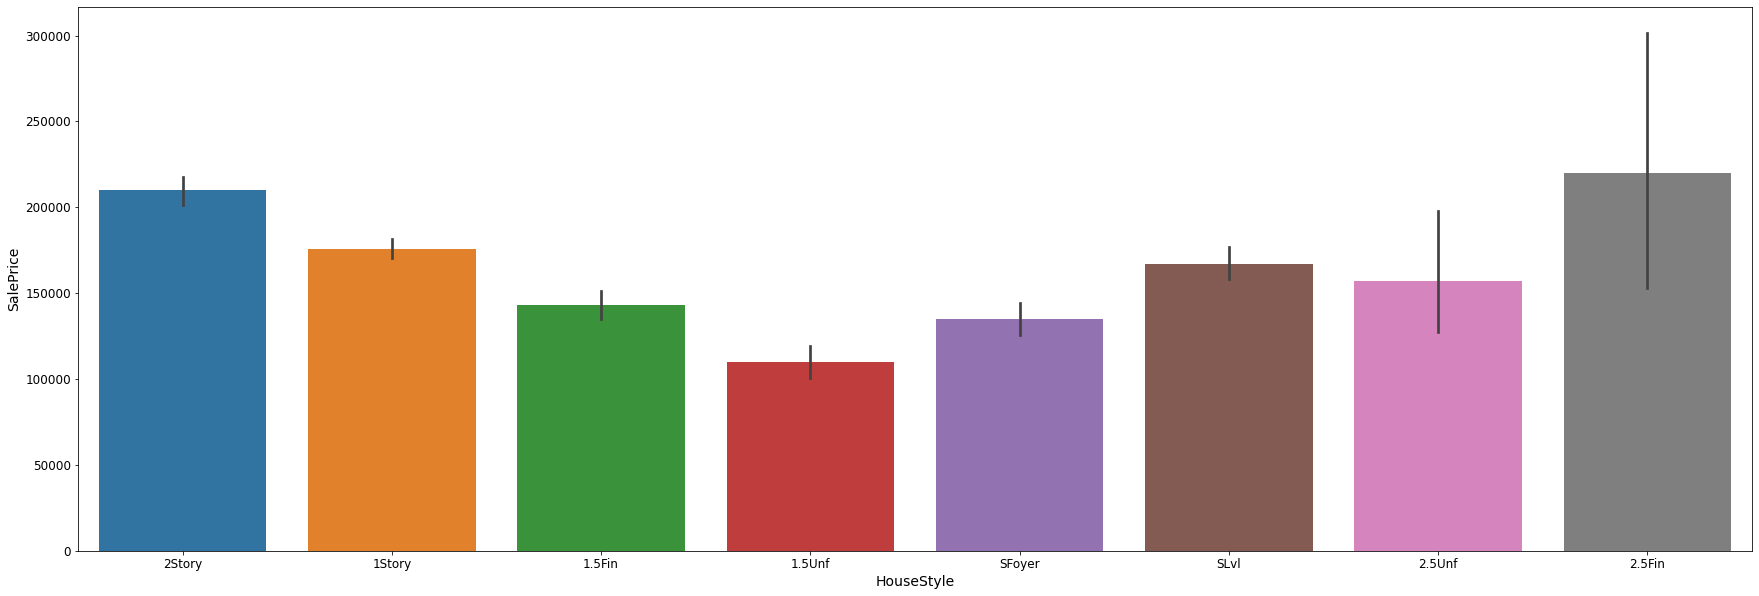

In [440]:
plt.figure(figsize=(30,10))
sns.barplot(x='HouseStyle', y='SalePrice',data=data)

- **MSZoning** : FV > RL > RH > RM > C
- **Street** :   Paved > Grvl
- **LotShape** : IR2 > IR3 > IR1 > Reg
- **LandContour** : HLS > Low > Lvl > Bnk
- **Utilities** : AllPub > NoSeWa
- **LotConfig** : CulDSac > FR3 > Corner > FR2 > Inside
- **LandSlope** : Sev > Mod > Gtl
- **Neighborhood** : NoRidge > NridgHt > StoneBr > Timber .....
- **Condition1** : PosA > PosN > RRNn > 
- **Condition2** : PosA > PosN > RRNn > RRNe > Norm > RRAn > Feedr > RRAe >                      Artery
- **BldgType**  : 1Fam > TwnhsE > Twnhs > Duplex > 2fmCon
- **HouseStyle** :

In [441]:
housing_cat_text.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
825,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,PosN,PosN,...,SBrkr,Ex,Typ,Attchd,Fin,TA,TA,Y,New,Partial
948,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
188,RL,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Alloca
1059,RL,Pave,IR1,HLS,AllPub,Corner,Mod,Crawfor,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,Fa,Y,WD,Normal
667,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [443]:
pd.DataFrame(housing_cat_text.MSZoning.value_counts(normalize=True))

,MSZoning
RL,0.786815
RM,0.156678
FV,0.040240
RH,0.011130
C (all),0.005137


In [456]:
by=housing_cat_text.groupby('MSZoning').LandContour.value_counts(normalize=True)

In [457]:
by

MSZoning  LandContour
C (all)   Lvl            0.500000
          Low            0.333333
          Bnk            0.166667
FV        Lvl            1.000000
RH        Lvl            0.692308
          Bnk            0.153846
          HLS            0.153846
RL        Lvl            0.893362
          Bnk            0.035909
          Low            0.035909
          HLS            0.034820
RM        Lvl            0.890710
          Bnk            0.081967
          HLS            0.027322
Name: LandContour, dtype: float64

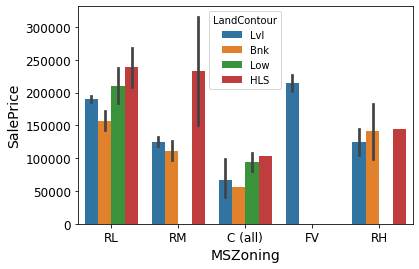

In [459]:
sns.barplot(x='MSZoning',y='SalePrice', data=data,hue='LandContour')

####  Conclusions: 
- Houses having *paved* streets have higher prices, for any MSZoning category.
- No specific trends in LotShape
--------------------------

NameError: name 'housing_cat_text' is not defined

In [461]:
from sklearn.preprocessing import OrdinalEncoder

In [463]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded= ordinal_encoder.fit_transform(housing_cat_text)
housing_cat_encoded[:10]

array([[ 3.,  1.,  3.,  3.,  0.,  4.,  0., 16.,  4.,  4.,  0.,  2.,  3.,
         1.,  5.,  5.,  1.,  0.,  4.,  2.,  0.,  0.,  3.,  0.,  2.,  5.,
         1.,  0.,  1.,  4.,  0.,  5.,  1.,  0.,  4.,  4.,  2.,  6.,  5.],
       [ 3.,  1.,  0.,  3.,  0.,  4.,  0.,  5.,  2.,  2.,  0.,  5.,  1.,
         1., 12., 13.,  1.,  2.,  4.,  2.,  2.,  2.,  3.,  3.,  5.,  5.,
         1.,  0.,  1.,  4.,  2.,  5.,  1.,  1.,  4.,  4.,  2.,  8.,  4.],
       [ 3.,  1.,  3.,  0.,  0.,  4.,  0., 20.,  1.,  2.,  2.,  6.,  1.,
         1.,  9., 10.,  3.,  3.,  4.,  1.,  2.,  2.,  3.,  0.,  2.,  5.,
         1.,  4.,  1.,  4.,  3.,  5.,  5.,  2.,  4.,  4.,  2.,  8.,  2.],
       [ 3.,  1.,  0.,  1.,  0.,  0.,  1.,  6.,  2.,  2.,  0.,  0.,  1.,
         1.,  8.,  8.,  1.,  3.,  4.,  1.,  3.,  3.,  3.,  2.,  4.,  3.,
         1.,  4.,  1.,  4.,  3.,  5.,  5.,  2.,  4.,  1.,  2.,  8.,  4.],
       [ 3.,  1.,  3.,  3.,  0.,  4.,  0., 20.,  2.,  2.,  0.,  2.,  1.,
         1.,  6.,  6.,  1.,  3.,  4.,  2.,  2.,

In [464]:
ordinal_encoder.categories_

[array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['1.5Fin', '1.5Unf', '1Story', '2.5Fin', '

In [465]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder=OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<1168x311 sparse matrix of type '<class 'numpy.float64'>'
	with 58400 stored elements in Compressed Sparse Row format>

In [466]:
housing_cat_1hot.toarray()

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [467]:
cat_encoder.categories_

[array([ 20,  30,  40,  45,  50,  60,  70,  75,  80,  85,  90, 120, 160,
        180, 190], dtype=int64),
 array(['C (all)', 'FV', 'RH', 'RL', 'RM'], dtype=object),
 array(['Grvl', 'Pave'], dtype=object),
 array(['IR1', 'IR2', 'IR3', 'Reg'], dtype=object),
 array(['Bnk', 'HLS', 'Low', 'Lvl'], dtype=object),
 array(['AllPub', 'NoSeWa'], dtype=object),
 array(['Corner', 'CulDSac', 'FR2', 'FR3', 'Inside'], dtype=object),
 array(['Gtl', 'Mod', 'Sev'], dtype=object),
 array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
        'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
        'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
        'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
        'Veenker'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAn', 'RRNn'],
       dtype=object),
 array(['1Fam'

In [468]:
housing_num.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000


In [470]:
housing_cat_1hot.shape

(1168, 311)

In [484]:
housing_predictors2=housing_predictors

In [485]:
hou=housing_predictors2.to_numpy()

In [488]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline= Pipeline([('imputer', SimpleImputer(strategy='median')),
                       ('std_scaler',StandardScaler()),])
housing_num_tr=num_pipeline.fit_transform(housing_num_tr)

In [489]:
housing_num_tr

array([[-0.22087509, -0.20714171,  0.51410389, ..., -0.06869175,
        -0.08768781,  0.34727322],
       [ 0.46031974, -0.09188637, -0.57075013, ..., -0.06869175,
        -0.08768781,  0.00728832],
       [-0.08463612,  0.07347998,  0.32591493, ..., -0.06869175,
        -0.08768781,  0.53615372],
       ...,
       [-0.1754621 , -0.14781027, -0.57075013, ..., -0.06869175,
         4.95311151,  1.07761115],
       [-0.08463612, -0.08016039, -0.57075013, ..., -0.06869175,
        -0.08768781, -0.48852299],
       [ 0.23325479, -0.05811155, -0.57075013, ..., -0.06869175,
        -0.08768781, -0.42084081]])

In [473]:
from sklearn.compose import ColumnTransformer

In [497]:
housing_predictors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 825 to 747
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1168 non-null   float64
 1   LotArea        1168 non-null   float64
 2   MasVnrArea     1168 non-null   float64
 3   BsmtFinSF1     1168 non-null   float64
 4   BsmtFinSF2     1168 non-null   float64
 5   BsmtUnfSF      1168 non-null   float64
 6   TotalBsmtSF    1168 non-null   float64
 7   1stFlrSF       1168 non-null   float64
 8   2ndFlrSF       1168 non-null   float64
 9   LowQualFinSF   1168 non-null   float64
 10  WoodDeckSF     1168 non-null   float64
 11  OpenPorchSF    1168 non-null   float64
 12  EnclosedPorch  1168 non-null   float64
 13  3SsnPorch      1168 non-null   float64
 14  ScreenPorch    1168 non-null   float64
 15  PoolArea       1168 non-null   float64
 16  MiscVal        1168 non-null   float64
 17  MSSubClass     1168 non-null   int64  
 18  MSZonin

In [501]:
housing_predictors2.index

Int64Index([ 825,  948,  188, 1059,  667,  968, 1194,  331, 1437,   25,
            ...
            1026, 1134, 1149,   12,  766,   45,  180, 1090, 1368,  747],
           dtype='int64', length=1168)

In [517]:
num_attribs = list(housing_num)
cat_attribs= list(housing_cat)

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs),])

housing_prepared = full_pipeline.fit_transform(housing_predictors2)

In [518]:
housing_prepared.shape

(1168, 333)

In [519]:
from sklearn.linear_model import LinearRegression

lin_reg= LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [520]:
some_data = housing.iloc[:5]
some_labels= housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print('Predictions: ', lin_reg.predict(some_data_prepared))

Predictions:  [[207086.40583988]
 [196640.92648264]
 [211759.18129144]
 [166864.27624139]
 [289212.09456915]]


c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\sklearn\compose\_column_transformer.py:427: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [522]:
some_labels

,SalePrice
825,385000.0
948,192500.0
188,153337.0
1059,220000.0
667,193500.0


In [523]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

16598.481536174037

- Our model works well, as the lowest price of house is 34900 and highest being 625000, Therefore having RMSE of 16500, is quite good.
-----------
- Let's try another model, to see if it can be improved. But first,lets evaluate it by cross-validation.

In [532]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
lin_rmse_scores = np.sqrt(-scores)

In [533]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    
display_scores(lin_rmse_scores)

Scores:  [23680.68656149 33185.60243271 27333.27292821 34082.30612509
 22012.43114152 23352.04510226 26377.14638831 20559.38800896
 67720.87165521 24535.78760918]
Mean:  30283.95379529451
Standard Deviation:  13175.813839450211


- Score on the training set is lower than validation set, which means that model is overfitting.
    - We can try to regularize the model
    - We can fine-tune our model.

---------------
- Let's use SVR 

In [534]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(housing_prepared, housing_labels)

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVR(C=1.0, dual=True, epsilon=1.5, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)

In [535]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(svm_reg, housing_prepared, housing_labels,
                        scoring='neg_mean_squared_error',cv=10)
svm_rmse_scores = np.sqrt(-scores)

c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\abhij\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:760: DataConversio

In [536]:
display_scores(svm_rmse_scores)

Scores:  [171787.01544278 169486.2771722  150568.74301283 166258.52887296
 164809.27719295 158597.08108344 186396.07676857 156660.17096485
 160207.72560238 173563.4743566 ]
Mean:  165833.43704695668
Standard Deviation:  9663.1606824524


- We can clearly see, it has very bad mean score.